In [1]:
import sys

#sys.path.insert(0, 'backend_functions')

#import selection_functions as sf

import importlib

import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb

import awkward
import matplotlib.pyplot as plt
import pandas as pd

import ROOT
from ROOT import TH1F, TH2F, TDirectory, TH1D

from matplotlib import gridspec


Welcome to JupyROOT 6.24/02


In [2]:
ending = "Dec19_noTune"

In [3]:
##Regular tune prior true and smearcept to be used


#prior true
#"nue_full_500_catsel_nopions_angleDiff_usingSelection_prior_true_signal_blockwise_recoCut_comb_"+ending+".csv"

In [4]:
####Load in noTune full event counts

nue_data_signal = pd.read_csv("nue_full_500_catsel_nopions_recoE_usingSelection_full_evt_count_MCONLY_recoCut_comb_"+ending+".csv", header=None)

nue_data_signal = nue_data_signal.values[:, 0]

print(nue_data_signal)
print("")

######

numu_data_signal = pd.read_csv("numu_full_500_catsel_nopions_recoE_usingSelection_full_evt_count_MCONLY_recoCut_comb_"+ending+".csv", header=None)

numu_data_signal = numu_data_signal.values[:, 0]

print(numu_data_signal)

[155.29271785  15.33352131  10.9478483    5.96303402   3.18888814
   2.74037327   2.02905916   3.47225477]

[1040.10610024  323.62419437  212.82975114  137.61698011   92.90787021
   59.2203096    36.76615492   59.06312476]


In [5]:
###Load in regular tune bkg event counts
#Include ext in bkg count here as the full event counts do

ending = "Dec19" #need this ending as bkg is from regular tune



nue_bkg_inc_ext = pd.read_csv("nue_nopions_energy_usingSelection_comb_cv_nue_bkg_incExt_"+ending+".csv", header=None)

nue_bkg_inc_ext = nue_bkg_inc_ext.values[:, 0]

print(nue_bkg_inc_ext)
print("")

#######################

numu_bkg_inc_ext = pd.read_csv("numu_nopions_energy_usingSelection_comb_cv_numu_bkg_incExt_"+ending+".csv", header=None)

numu_bkg_inc_ext = numu_bkg_inc_ext.values[:, 0]

print(numu_bkg_inc_ext)
print("")

[62.59224335  5.55573535  5.02205593  2.00620096  0.97365075  1.10218284
  1.1300239   1.42903398]

[415.01103581 119.69596297  89.30328865  60.57022222  38.65368768
  24.6720737   15.53150675  25.7901954 ]



In [6]:
####So then can calculate the data signal input to the unfolding

nue_datasig_bkg_subtracted = nue_data_signal - nue_bkg_inc_ext
print(nue_datasig_bkg_subtracted)
print("")

numu_datasig_bkg_subtracted = numu_data_signal - numu_bkg_inc_ext
print(numu_datasig_bkg_subtracted)

[92.7004745   9.77778595  5.92579236  3.95683307  2.21523738  1.63819044
  0.89903526  2.04322079]

[625.09506443 203.9282314  123.5264625   77.04675789  54.25418253
  34.5482359   21.23464817  33.27292936]


In [7]:
nue_numu_tot = np.concatenate((nue_datasig_bkg_subtracted, numu_datasig_bkg_subtracted), axis=0)

print(nue_numu_tot)
print(len(nue_numu_tot))

[ 92.7004745    9.77778595   5.92579236   3.95683307   2.21523738
   1.63819044   0.89903526   2.04322079 625.09506443 203.9282314
 123.5264625   77.04675789  54.25418253  34.5482359   21.23464817
  33.27292936]
16


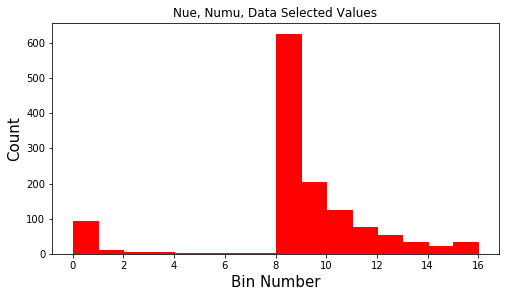

In [8]:
nue_numu_fig = plt.figure(figsize=(8, 7))
nue_numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_numu_ax1 = plt.subplot(nue_numu_gs[0])


#bins = np.arange(0, 10.5, 0.5)
#count = np.linspace(0.1, 9.6, 20)
bins = np.arange(0, 17, 1)
count = np.arange(0.0, 16.0, 1)


sel_ratio = nue_numu_ax1.hist(count, bins, edgecolor='red', facecolor='red', weights=nue_numu_tot)
nue_numu_ax1.set_ylabel('Count', fontsize=15)
nue_numu_ax1.set_xlabel('Bin Number', fontsize=15)
nue_numu_ax1.set_title("Nue, Numu, Data Selected Values")
#leg = nue_numu_ax1.legend()
#nue_numu_ax1.set_ylim([0, 1])

nue_numu_fig.savefig("data_signal_MC_noTune_input_recoE_comb_"+ending+".svg", bbox_inches='tight')

In [9]:
np.savetxt("data_signal_MC_noTune_input_recoE_comb_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')

print(ending)

Dec19


In [10]:
####Now need to get in the uncertainties

###First up, get the noTune statistical uncertinaty. This will be from sig + bkg in noTune

ending = "Dec19_noTune" 


nue_sig_unc = pd.read_csv("nue_total_noTune_err_squared_energy_comb_"+ending+".csv", header=None)

nue_sig_unc = nue_sig_unc.values[:, 0]

print(nue_sig_unc)
print("")

########################

numu_sig_unc = pd.read_csv("numu_total_noTune_err_squared_energy_comb_"+ending+".csv", header=None)

numu_sig_unc = numu_sig_unc.values[:, 0]

print(numu_sig_unc)
print("")

[14.22582665  0.56784266  0.65827362  0.40632509  0.05296263  0.16554011
  0.19434661  0.2034021 ]

[256.3376852   72.26326479  45.30174001  27.20601223  19.15894231
  12.09108815   7.80968778  11.70766565]



In [11]:
####The regular tune bkg stat uncertainties

ending = "Dec19" #need this ending as bkg is from regular tune


nue_bkg_unc = pd.read_csv("nue_bkg_exp_err_squared_energy_comb_"+ending+".csv", header=None)

nue_bkg_unc = nue_bkg_unc.values[:, 0]

print(nue_bkg_unc)
print("")

########################

numu_bkg_unc = pd.read_csv("numu_bkg_exp_err_squared_energy_comb_"+ending+".csv", header=None)

numu_bkg_unc = numu_bkg_unc.values[:, 0]

print(numu_bkg_unc)
print("")

[13.54005544  0.50655146  0.630814    0.2048277   0.01706823  0.13865351
  0.18420521  0.16901565]

[143.18992306  32.15392447  23.73478076  15.40010457  14.09497304
   8.15430659   5.02663155   5.43286998]



In [12]:
nue_stat_unc = nue_sig_unc + nue_bkg_unc
print(nue_stat_unc)
print("")

########################

numu_stat_unc = numu_sig_unc + numu_bkg_unc
print(numu_stat_unc)
print("")

#########################

nue_numu_tot_unc = np.concatenate((nue_stat_unc, numu_stat_unc), axis=0)

print(nue_numu_tot_unc)

[27.76588209  1.07439411  1.28908762  0.61115279  0.07003086  0.30419362
  0.37855181  0.37241775]

[399.52760826 104.41718926  69.03652077  42.6061168   33.25391535
  20.24539474  12.83631933  17.14053563]

[2.77658821e+01 1.07439411e+00 1.28908762e+00 6.11152787e-01
 7.00308641e-02 3.04193615e-01 3.78551814e-01 3.72417755e-01
 3.99527608e+02 1.04417189e+02 6.90365208e+01 4.26061168e+01
 3.32539154e+01 2.02453947e+01 1.28363193e+01 1.71405356e+01]


In [13]:
nue_numu_cov_stats   = np.zeros([(len(bins)-1), (len(bins)-1)])
print(nue_numu_cov_stats)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [14]:
nue_numu_cov_stats[np.diag_indices_from(nue_numu_cov_stats)]    = nue_numu_tot_unc

In [15]:
###Then sprinkle in the regular tune genie sys uncertainties

# Load in the blockwise genie cov matrix

blockwise_genie_err = pd.read_csv("blockwise_cov_genie_only_RecoE_comb_"+ending+".csv", header=None)

blockwise_genie_err = blockwise_genie_err.values
print(blockwise_genie_err)

[[ 7.02584754e+02  9.66961224e+01  4.72505820e+01  1.95653861e+01
   1.55394334e+01  8.94111218e+00  9.28134248e+00  1.34670857e+01
   4.71351688e+02  1.38674156e+02  8.23006911e+01  5.31638324e+01
   3.38088659e+01  2.03134134e+01  1.56197023e+01  2.35509042e+01]
 [ 9.66961224e+01  1.41866669e+01  6.55743105e+00  2.65187422e+00
   2.23032423e+00  1.19496853e+00  1.29913089e+00  1.87508348e+00
   3.33971308e+00  3.40906010e-01 -3.90257578e+00 -2.07148673e+00
  -1.48469940e+00 -8.33071089e-01  5.01995680e-01 -9.37515310e-01]
 [ 4.72505820e+01  6.55743105e+00  3.64302075e+00  1.39455931e+00
   1.07560765e+00  6.63893934e-01  6.43107645e-01  9.02718599e-01
   2.86365182e+01  1.12475099e+01  4.76837143e+00  3.80393571e+00
   2.37646504e+00  1.35923712e+00  1.84784207e+00  1.80189479e+00]
 [ 1.95653861e+01  2.65187422e+00  1.39455931e+00  6.61086878e-01
   4.69503414e-01  3.01099636e-01  2.41223780e-01  4.21723566e-01
   1.81158248e+01  6.22601207e+00  5.45933666e+00  3.35201679e+00
   2.25

In [16]:
##### Now make the total cov matrix

total_noTune_input_cov = nue_numu_cov_stats + blockwise_genie_err

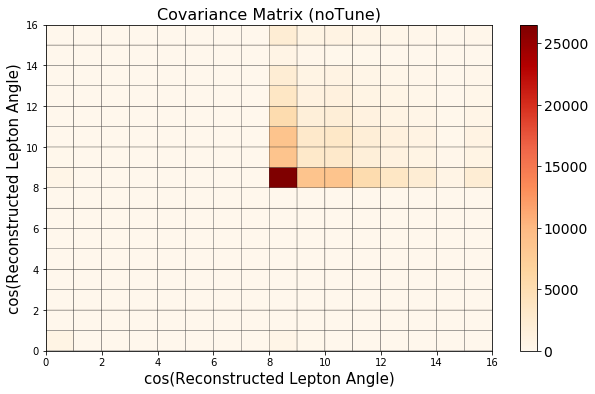

In [17]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_noTune_input_cov, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#if pot: 
#    cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])


plt.xlabel("cos(Reconstructed Lepton Angle)", fontsize=15)
plt.ylabel("cos(Reconstructed Lepton Angle)", fontsize=15)

plt.title('Covariance Matrix (noTune)', fontsize=16)


plt.savefig("data_covmat_MC_noTune_input_recoE_comb_"+ending+".svg", bbox_inches='tight')

plt.show()

In [18]:
np.savetxt("data_covmat_MC_noTune_input_recoE_comb_"+ending+".csv", 
           total_noTune_input_cov,
           delimiter =", ", 
           fmt ='% s')

In [19]:
ending

'Dec19'